## Twitter API Credentials

In [1]:
import tweepy

consumerKey = 'YOUR CONSUMER KEY'
consumerSecret = 'YOUR CONSUMER SECRET'
accessToken = 'YOUR ACCESS TOKEN'
accessTokenSecret = 'YOUR ACCESS TOKEN SECRET'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the Access Token and Access Token Secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the Authentication information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

## Crawling Tweets using Twitter API

In [2]:
# Extract the latest 300 tweets from World Health Organization twitter Account (Feel free to modify)
posts = api.user_timeline(
    screen_name = "who", 
    count = 300, 
    tweet_mode = "extended"
)

# A variable to show the tweet's number in the looping below
i = 1

# Show the latest 10 tweets that has been crawled
print("Show 10 recent tweets : \n")
for tweet in posts[0:10]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i+1

Show 10 recent tweets : 

1) Since the beginning of the #COVID19 pandemic, WHO has taken steps to prevent an “infodemic”— an overabundance of information &amp; the rapid spread of misleading or fabricated news, images, &amp; videos.

Here are 7 tips for stopping the spread of misinformation:
https://t.co/moExSVJXsQ

2) Through the WHO-@Wikimedia collaboration, people everywhere will be able to access and share WHO infographics, videos, and other public health assets on Wikimedia Commons, a digital library of free images and other multimedia. https://t.co/xatbBUJQgm

3) The collaboration is part of a shared commitment from both organizations to ensure everyone has access to critical public health information surrounding the #COVID19 pandemic

👉 https://t.co/G6pxbDhnzR

https://t.co/Ozz1AcFxQd

4) The World Health Organization and @Wikimedia Foundation expand access to trusted information about #COVID19 on @Wikipedia
 👉 https://t.co/G6pxbDhnzR

https://t.co/MeHFimxSUk

5) The 🌍 is overlo

## Creating a dataframe with a column named Tweets

In [3]:
import pandas as pd

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Uncomment the line below if you want to expand thw output display to see more columns of a pandas dataframe (THIS DOES NOT AFFECT THE RESULT)
# pd.set_option('display.max_colwidth', None)

df.head()

,Tweets
0,"Since the beginning of the #COVID19 pandemic, ..."
1,"Through the WHO-@Wikimedia collaboration, peop..."
2,The collaboration is part of a shared commitme...
3,The World Health Organization and @Wikimedia F...
4,The 🌍 is overloaded with #COVID19 misinformati...


## Data Preprocessing

### Cleaning Tweets using Regular Expression

In [4]:
import re

# A function to remove Emoji/Emoticons from Tweets
def cleanEmoji(text):
  regrex_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
  "]+", flags = re.UNICODE)
  
  return regrex_pattern.sub(r'',text)

# A function to remove unnecessary letters/things
def cleanText(text):
  text = re.sub(r'@[a-zA-Z0-9]+', '', text) # Remove usernames (e.g. : @kevinadhiguna)
  text = re.sub(r'#', '', text) # Remove hashtags (#)
  text = re.sub(r':', '', text) # Remove colons (:)
  text = re.sub(r'RT[\s]+', '', text) # Remove retweet letters (RT)
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text) # Remove URL/links
  text = re.sub(r'[^\x00-\x7F]+',' ', text) # Remove non-ASCII characters
  text = re.sub('[^a-zA-Z]', ' ', text) # Remove any character that is NOT a-z or A-Z 

  return text

# Remove Emojis/Emoticons from Tweets
df['Tweets'] = df['Tweets'].apply(cleanEmoji)

# Remove unnecessary letters/things from Tweets
df['Tweets'] = df['Tweets'].apply(cleanText)

In [5]:
df

,Tweets
0,Since the beginning of the COVID pandemic W...
1,Through the WHO collaboration people everywh...
2,The collaboration is part of a shared commitme...
3,The World Health Organization and Foundation ...
4,The is overloaded with COVID misinformation...
...,...
195,WHO is working with scientists to understand ...
196,The UK has reported that this new variant tra...
197,In the past few days there have been reports...
198,Media briefing on COVID with https t co v ...


## Check Subjectivity and Polarity of Tweets

In [6]:
from textblob import TextBlob

# A function to check Subjectivity
def checkSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# A function to check Polarity
def checkPolarity(text):
  return TextBlob(text).sentiment.polarity

# Implement checkSubjectivity function to 'Tweets' columns then create a column named 'Subjectivity' to save the subjectivity score.
df['Subjectivity'] = df['Tweets'].apply(checkSubjectivity)

# Implement checkSubjectivity function to 'Tweets' columns then create a column named 'Polarity' to save the polarity score.
df['Polarity'] = df['Tweets'].apply(checkPolarity)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity
0,Since the beginning of the COVID pandemic W...,0.750000,0.000000
1,Through the WHO collaboration people everywh...,0.373611,0.108333
2,The collaboration is part of a shared commitme...,0.433333,0.000000
3,The World Health Organization and Foundation ...,0.000000,0.000000
4,The is overloaded with COVID misinformation...,0.600000,-0.400000
...,...,...,...
195,WHO is working with scientists to understand ...,0.500000,0.333333
196,The UK has reported that this new variant tra...,0.714646,0.278283
197,In the past few days there have been reports...,0.320909,-0.062727
198,Media briefing on COVID with https t co v ...,0.000000,0.000000


## Plotting Word Cloud

Word Cloud or Text Cloud is a visualization where the more specific word will appear in a bolder and bigger text.

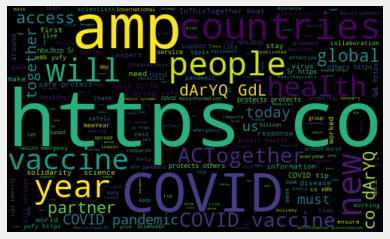

In [7]:
from wordcloud import WordCloud

allWords = ' '.join([twts for twts in df['Tweets']])
# Generate Word Cloud
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

# Display WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Compute Negative, Neutral, and Positive Analysis

In [8]:
# A function to label whether a tweet is Positive, Neutral, or Negative based on the Polarity score.
def getScore(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

# Implement getScore function to 'Polarity' columns then create a column named 'Analysis' to save a sentiment label.
df['Analysis'] = df['Polarity'].apply(getScore)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Since the beginning of the COVID pandemic W...,0.750000,0.000000,Neutral
1,Through the WHO collaboration people everywh...,0.373611,0.108333,Positive
2,The collaboration is part of a shared commitme...,0.433333,0.000000,Neutral
3,The World Health Organization and Foundation ...,0.000000,0.000000,Neutral
4,The is overloaded with COVID misinformation...,0.600000,-0.400000,Negative
...,...,...,...,...
195,WHO is working with scientists to understand ...,0.500000,0.333333,Positive
196,The UK has reported that this new variant tra...,0.714646,0.278283,Positive
197,In the past few days there have been reports...,0.320909,-0.062727,Negative
198,Media briefing on COVID with https t co v ...,0.000000,0.000000,Neutral


## Print All Positive Tweets

In [9]:
sortedDF = df.sort_values(by=['Polarity'])

# A variable to show the tweet's number in the looping below
j = 1

for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i] + '\n')
    j = j+1

1) Through the WHO  collaboration  people everywhere will be able to access and share WHO infographics  videos  and other public health assets on Wikimedia Commons  a digital library of free images and other multimedia  https  t co xatbBUJQgm

2) The WHO World report on vision draws attention to effective strategies to address eye care  and provides recommendations for action to improve eye care services worldwide   https  t co rBMMRsxcuJ  https  t co HLbLEp Bnq

3) While most people with vision impairment are over the age of       vision loss can affect people of all ages   Take care of your eyes https  t co hE WoXTNhX https  t co xF  e zwAn

4)  tips to identify COVID   misinformation or disinformation      Examine the supporting evidence    Credible stories back up their claims with facts   for example  quotes from experts or links to statistics or studies      https  t co  vsGKvB  F https  t co SI R WfPsi

5)  tips to identify COVID   misinformation or disinformation      Check the

147 out of 200 tweets are considered Positive.

## Print All Negative Tweets

In [10]:
neg_sortedDF = df.sort_values(by=['Polarity'], ascending=False)

# A variable to show the tweet's number in the looping below
j = 1

for i in range(0, neg_sortedDF.shape[0]):
  if(neg_sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + neg_sortedDF['Tweets'][i])
    print()
    j = j+1

1) The  is overloaded with COVID   misinformation    Before you share a post or an article  CHECK trusted sources like WHO  amp  natl  health authorities    If you believe the information is false or misleading  this is how you can REPOit on socialmedia https  t co LpbqypxMIa https  t co aZ Q ltMxK

2) COVID   lockdown or quarantine during the holiday season can make any of us feel lonely    Stay connected with your friends  amp  family via telephone   social media or online communities to maintain your MentalHealth  https  t co lsDBHKlEQ 

3) Are you still working from home  amp  sitting longer than usual It is important for your health to get up often  for at least   minutes  to stretch your muscles    Here are some tips to make your WorkFromHome routine healthier  https  t co JPwAk TCvs

4) Here s how you can prevent high blood pressure   Reduce   to less than  g day  Avoid saturated fats  amp  trans fats  Avoid   Reduce   Eat  and   regularly  BeActive    BeatNCDs for a healthier N

18 out of 200 tweets are considered Negative. In other words, 32, the rest of number of tweets, are Neutral.

## Plot polarity and subjectivity

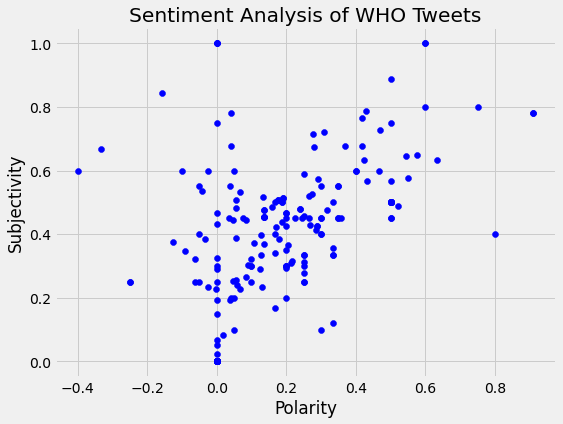

In [11]:
plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis of WHO Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Get percentage of Positive Tweets

In [12]:
# Only fetch Tweets that were labelled Positive in the 'Analysis' column.
ptweets = df[df.Analysis == 'Positive']

ptweets = ptweets['Tweets']

ptweets_percentage = round((ptweets.shape[0] / df.shape[0])*100, 1)

print('Percentage of Positive Tweets : ' + str(ptweets_percentage) + ' %')

Percentage of Positive Tweets : 73.5 %


## Get percentage of Negative Tweets

In [13]:
# Only fetch Tweets that were labelled Negative in the 'Analysis' column.
ntweets = df[df.Analysis == 'Negative']

ntweets = ntweets['Tweets']

ntweets_percentage = round((ntweets.shape[0] / df.shape[0])*100, 1)

print('Percentage of Negative Tweets : ' + str(ntweets_percentage) + ' %')

Percentage of Negative Tweets : 9.0 %


## Show the value counts

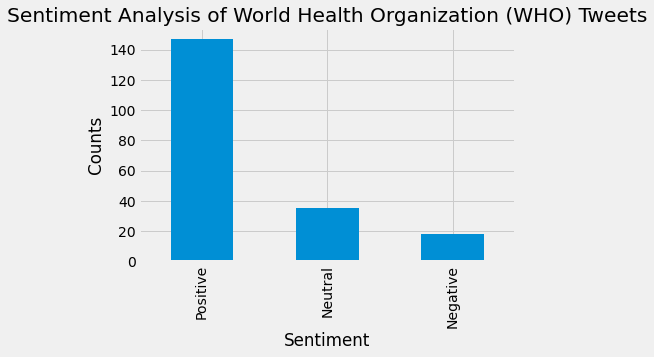

In [14]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis of World Health Organization (WHO) Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()